In [1]:
# Package imports
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams['figure.facecolor'] = 'w'
from astropy import log, constants, coordinates, units as u
import warnings
warnings.filterwarnings('ignore')
log.setLevel('ERROR')

# My functions
from mol_model import fetch_cubes, model_and_plot, list_mol_tags, get_cubes_from_mask, plot_mom0s

results = '/blue/adamginsburg/abulatek/brick/symlinks/imaging_results/contsub_smoothed_cubes_K/'

make: *** No targets specified and no makefile found.  Stop.


In [2]:
# Get list of all cubes
import glob
cubefns = glob.glob(f"{results}/source_ab_*.image.commonbeam.contsub.K.fits")

In [3]:
# Set coordinate of central source
crd = coordinates.SkyCoord("17:46:10.6339473267 -28:42:17.9807702398", frame='icrs', unit=(u.h, u.deg))

In [4]:
# Get only the cubes that have our line of interest in them
mol_tag = 46524
cubes, tbl = fetch_cubes(cubefns, catalog='CDMS', mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, parse_loc=False, ret_tbl=True)

[<Table length=131>
   FREQ      ERR    LGINT    DR     ELO     GUP  MOLWT  TAG  QNFMT   Ju    Ku    vu   F1u   F2u   F3u    Jl    Kl    vl   F1l   F2l   F3l     name     Lab 
   MHz       MHz   MHz nm2         1 / cm          u                                                                                                       
 float64   float64 float64 int64  float64  int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64 int64   str10     bool
---------- ------- ------- ----- --------- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ----- ---------- -----
85553.4546  0.0137 -6.0454     3  855.8894   107    46  5241   404    53     3    51     1    --    --    53     5    49     2    --    -- C2H5OH,v=0 False
85559.2353  0.0095 -5.7311     3  474.9108    75    46  5241   404    37     6    32     0    --    --    37     5    32     1    --    -- C2H5OH,v=0 False
85593.8926  0.0169 -7.8978     3  359.0336  

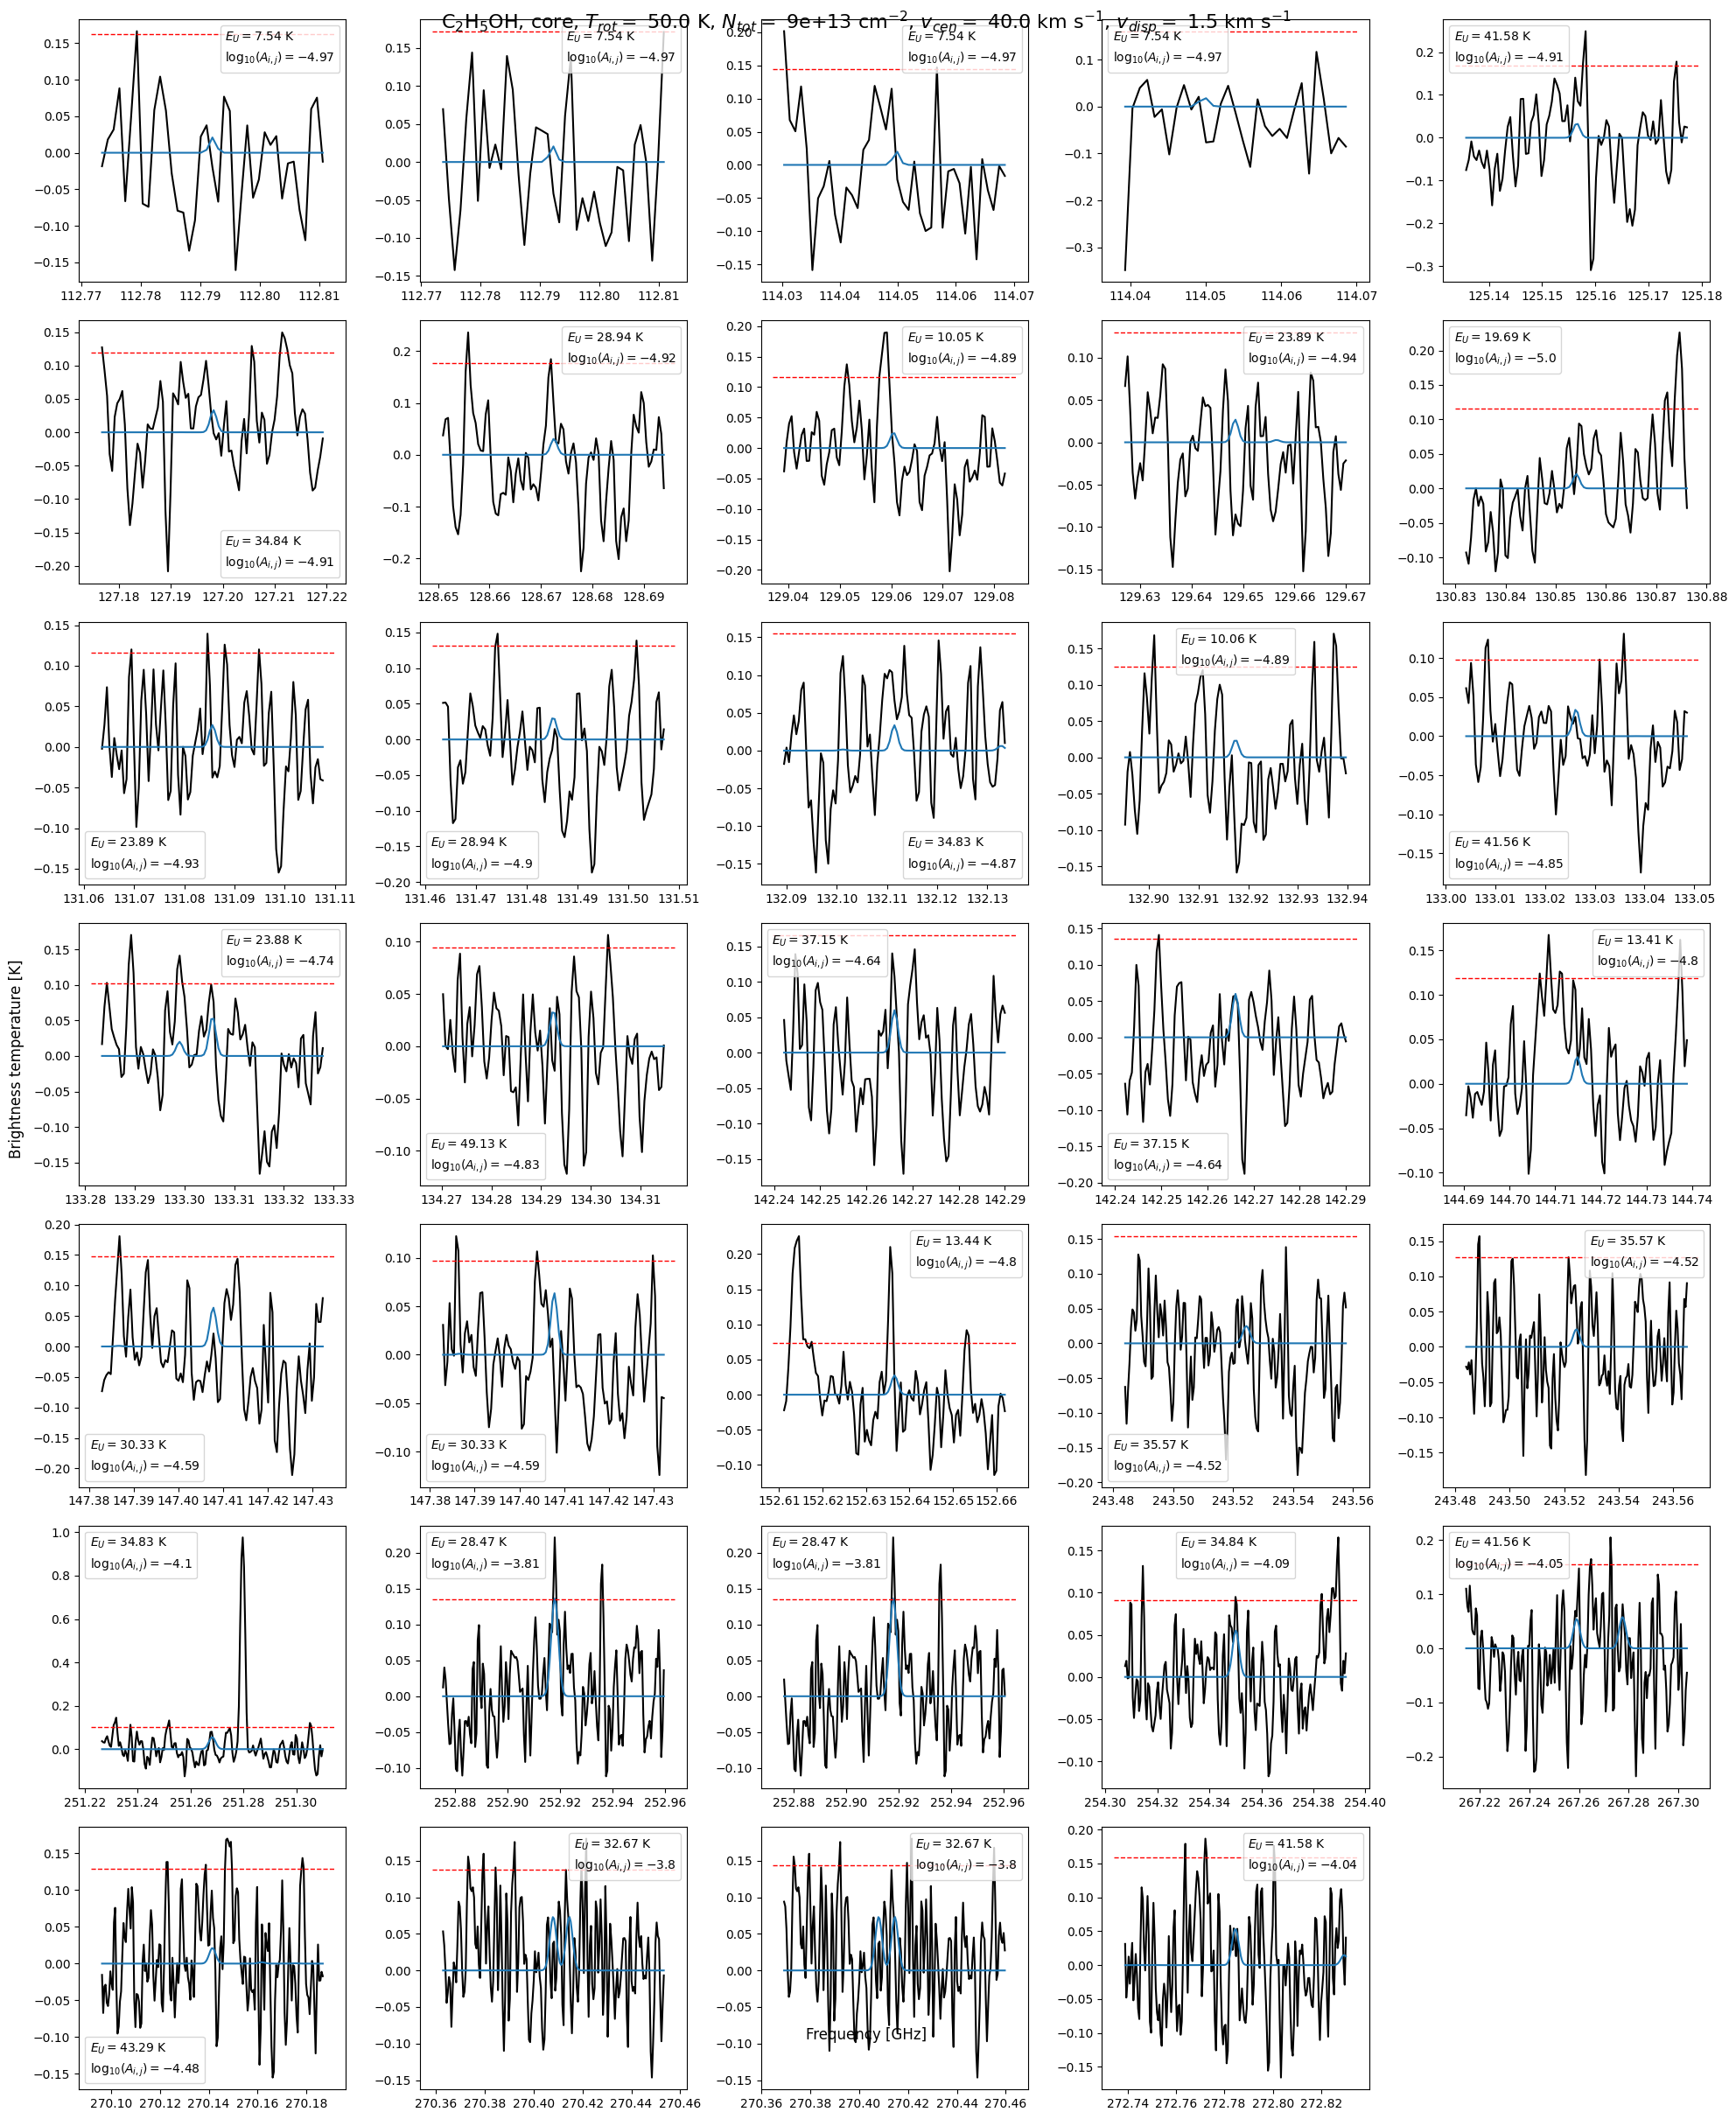

In [6]:
# Generate the model and plot the model and data spectra
model_and_plot(cubes, temp = 50., N_tot = 9.0e+13, v_cen = 40.*u.km/u.s, v_disp = 1.5*u.km/u.s,
               mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='CDMS', fig_width=20, fig_height=25,
               nrows=7, ncols=5, parse_loc=False, line_by_line=True, name_for_plot=f'C$_2$H$_5$OH', 
               extr_type="coord", crd=crd, show_2_sigma=True, EU_cutoff_K=50)

In [7]:
# Get subcubes based on mask
cubes_masked = get_cubes_from_mask("diffuse_regions.fits", 1, cubes, plot_region=False)

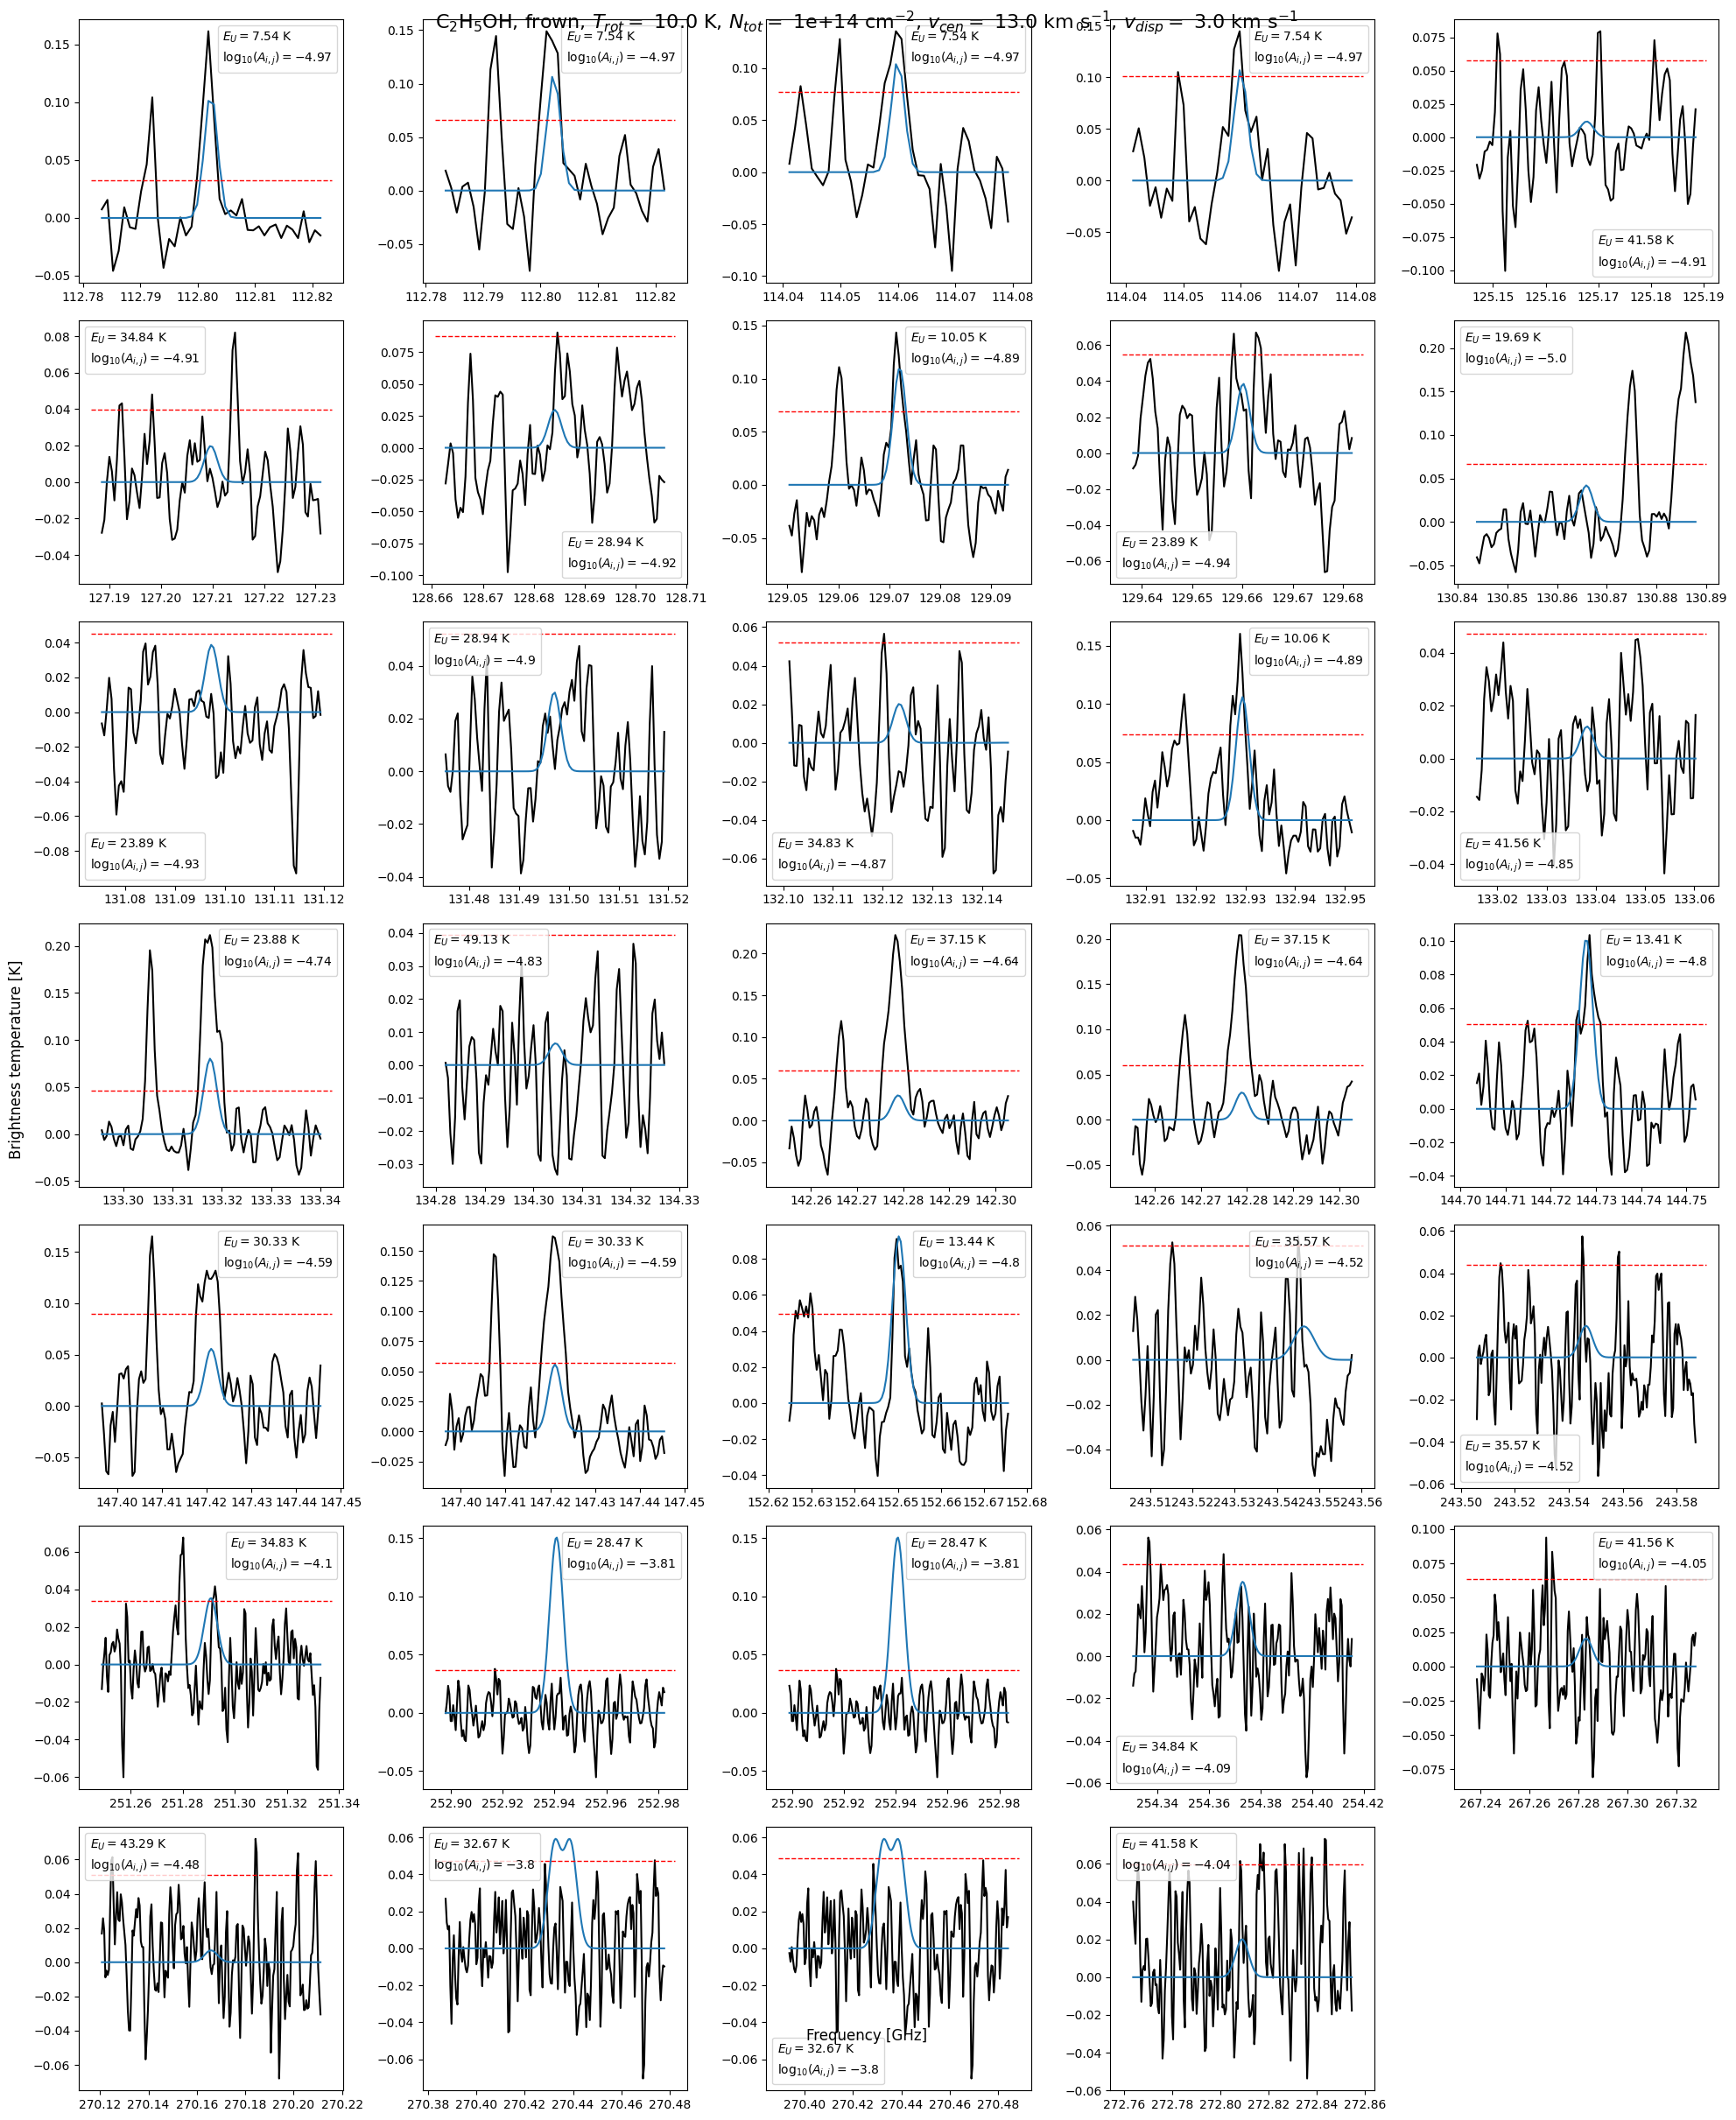

In [19]:
# Generate the model and plot the model and data spectra
freqs = model_and_plot(cubes_masked, temp = 10., N_tot = 1.0e+14, v_cen = 13.*u.km/u.s, v_disp = 3.*u.km/u.s,
                       mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='CDMS', fig_width=20, fig_height=25, 
                       nrows=7, ncols=5, parse_loc=False, ret_tbl=False, line_by_line=True, name_for_plot=f'C$_2$H$_5$OH', 
                       extr_type="reg", just_data=False, show_2_sigma=True, EU_cutoff_K=50, return_freqs=True)

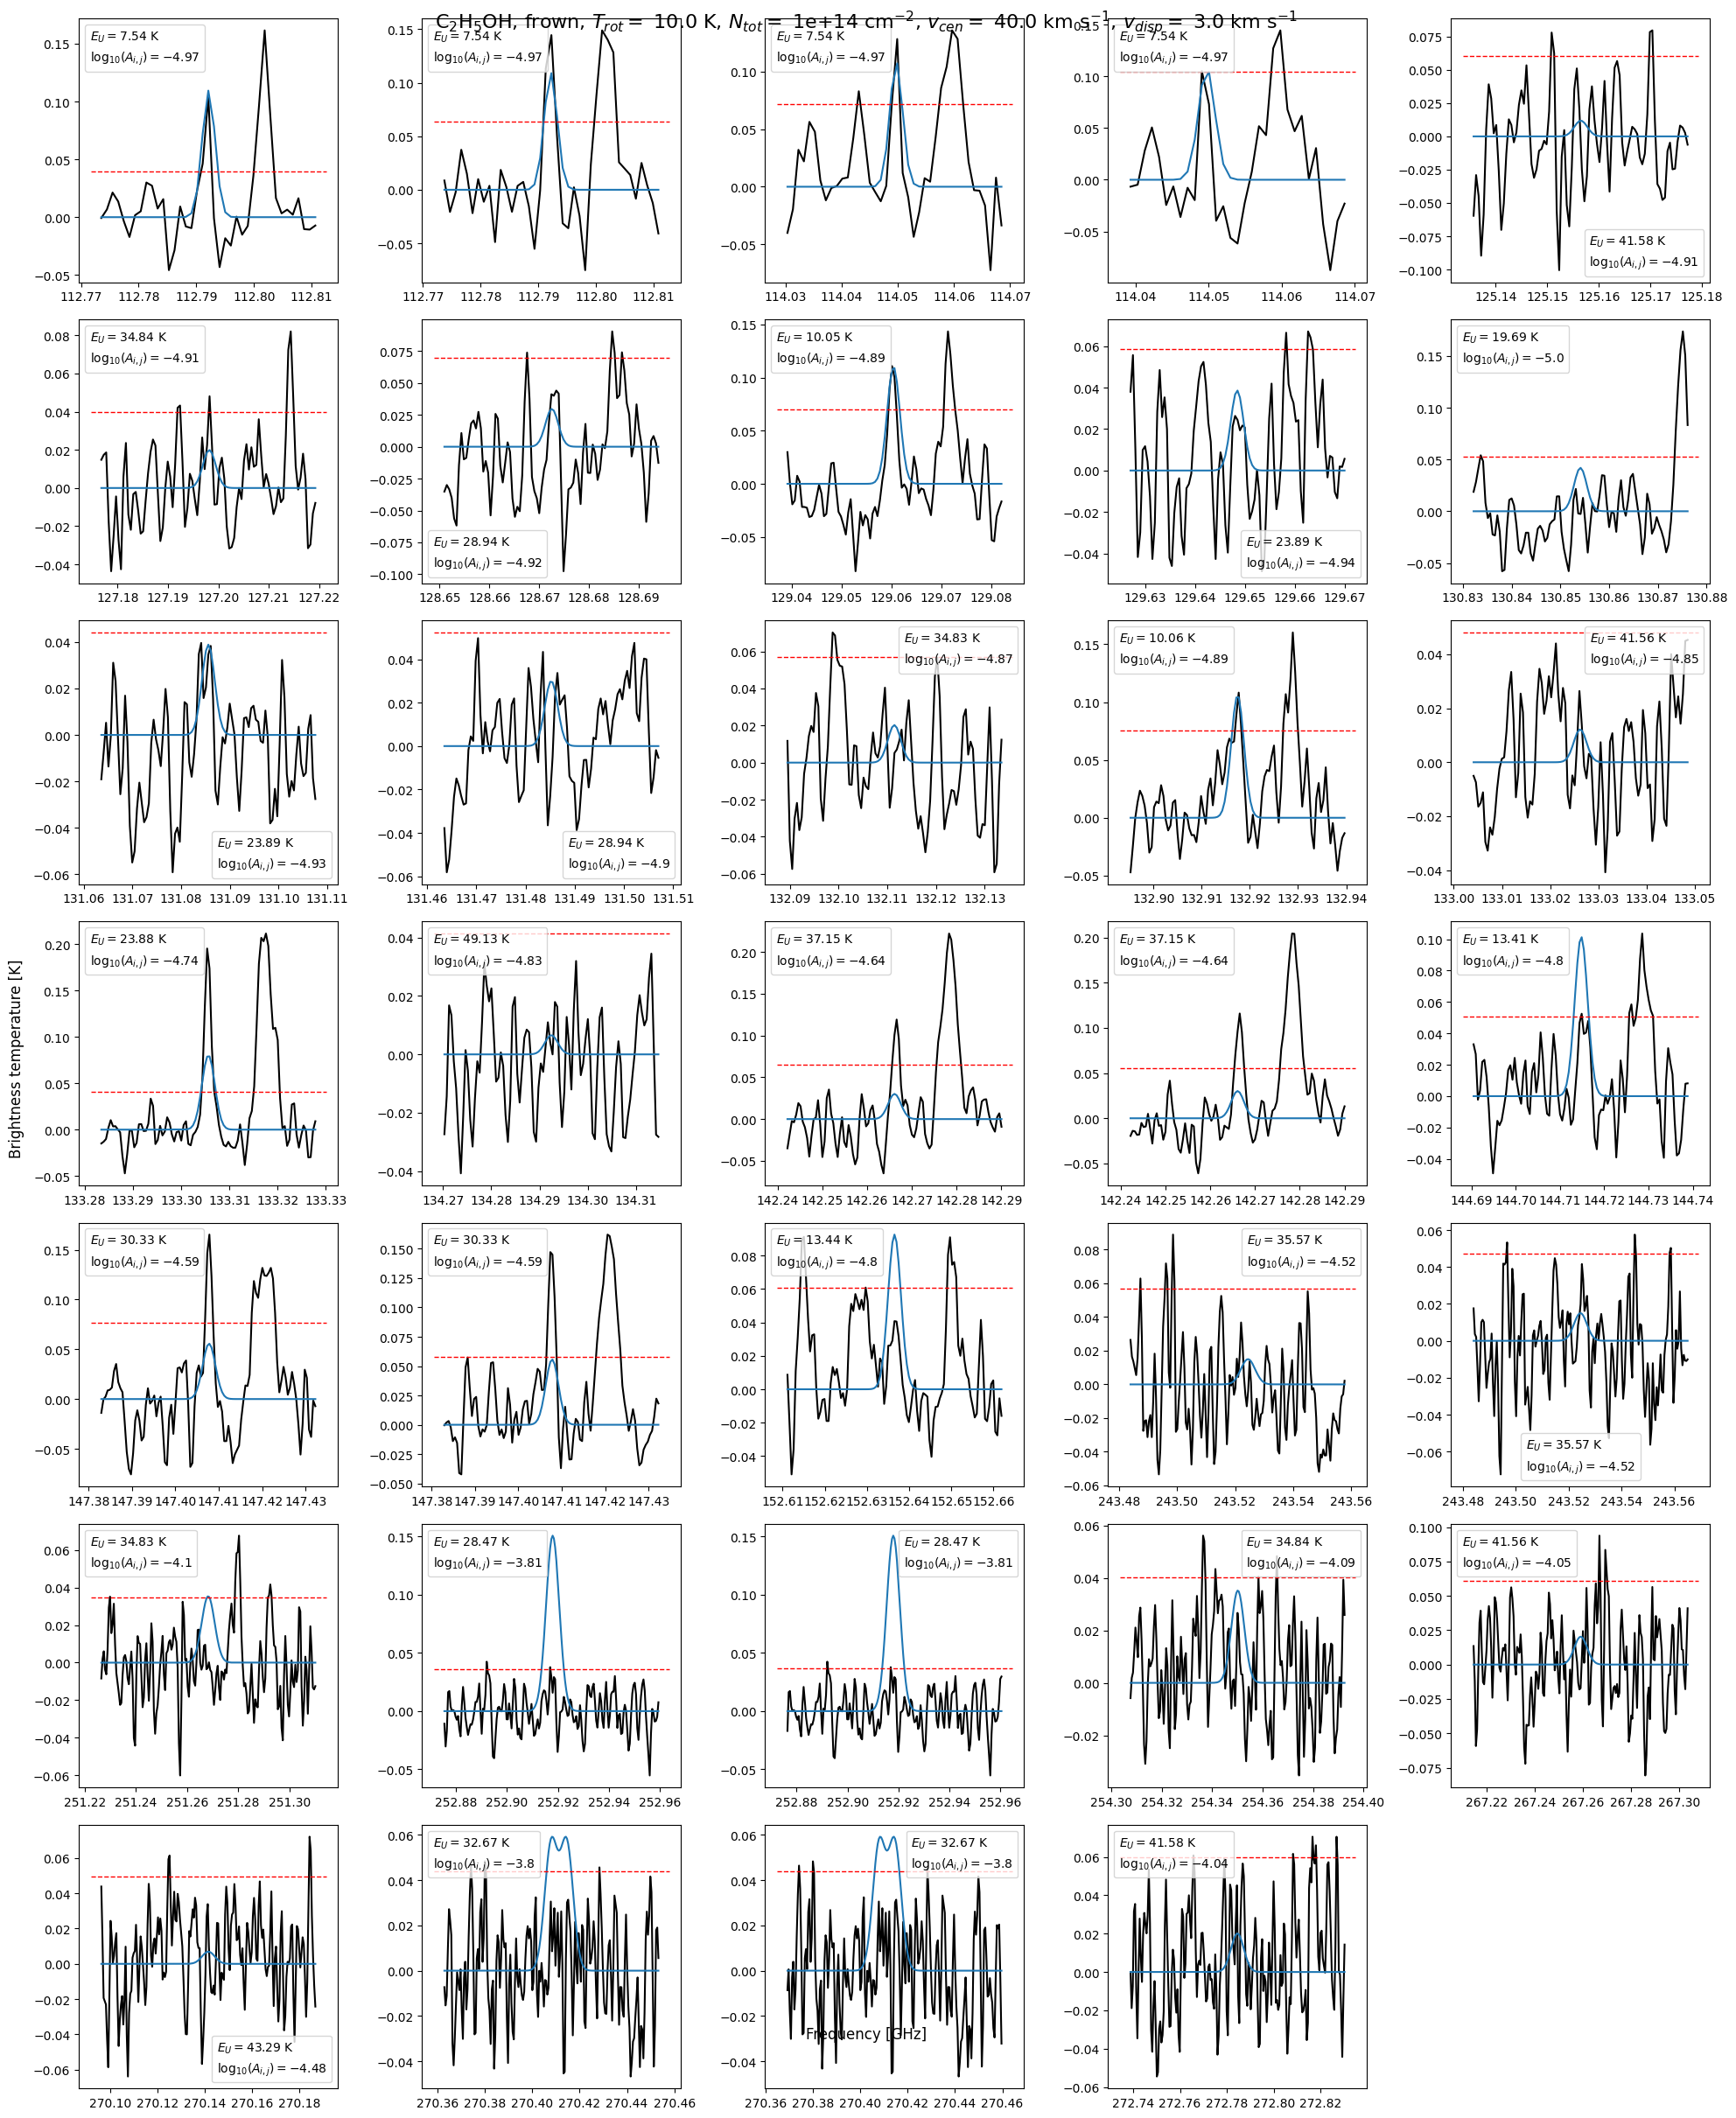

In [20]:
# Generate the model and plot the model and data spectra
freqs = model_and_plot(cubes_masked, temp = 10., N_tot = 1.0e+14, v_cen = 40.*u.km/u.s, v_disp = 3.*u.km/u.s,
                       mol_name_pyspeckit=None, mol_tag_pyspeckit=mol_tag, catalog='CDMS', fig_width=20, fig_height=25, 
                       nrows=7, ncols=5, parse_loc=False, ret_tbl=False, line_by_line=True, name_for_plot=f'C$_2$H$_5$OH', 
                       extr_type="reg", just_data=False, show_2_sigma=True, EU_cutoff_K=50, return_freqs=True)

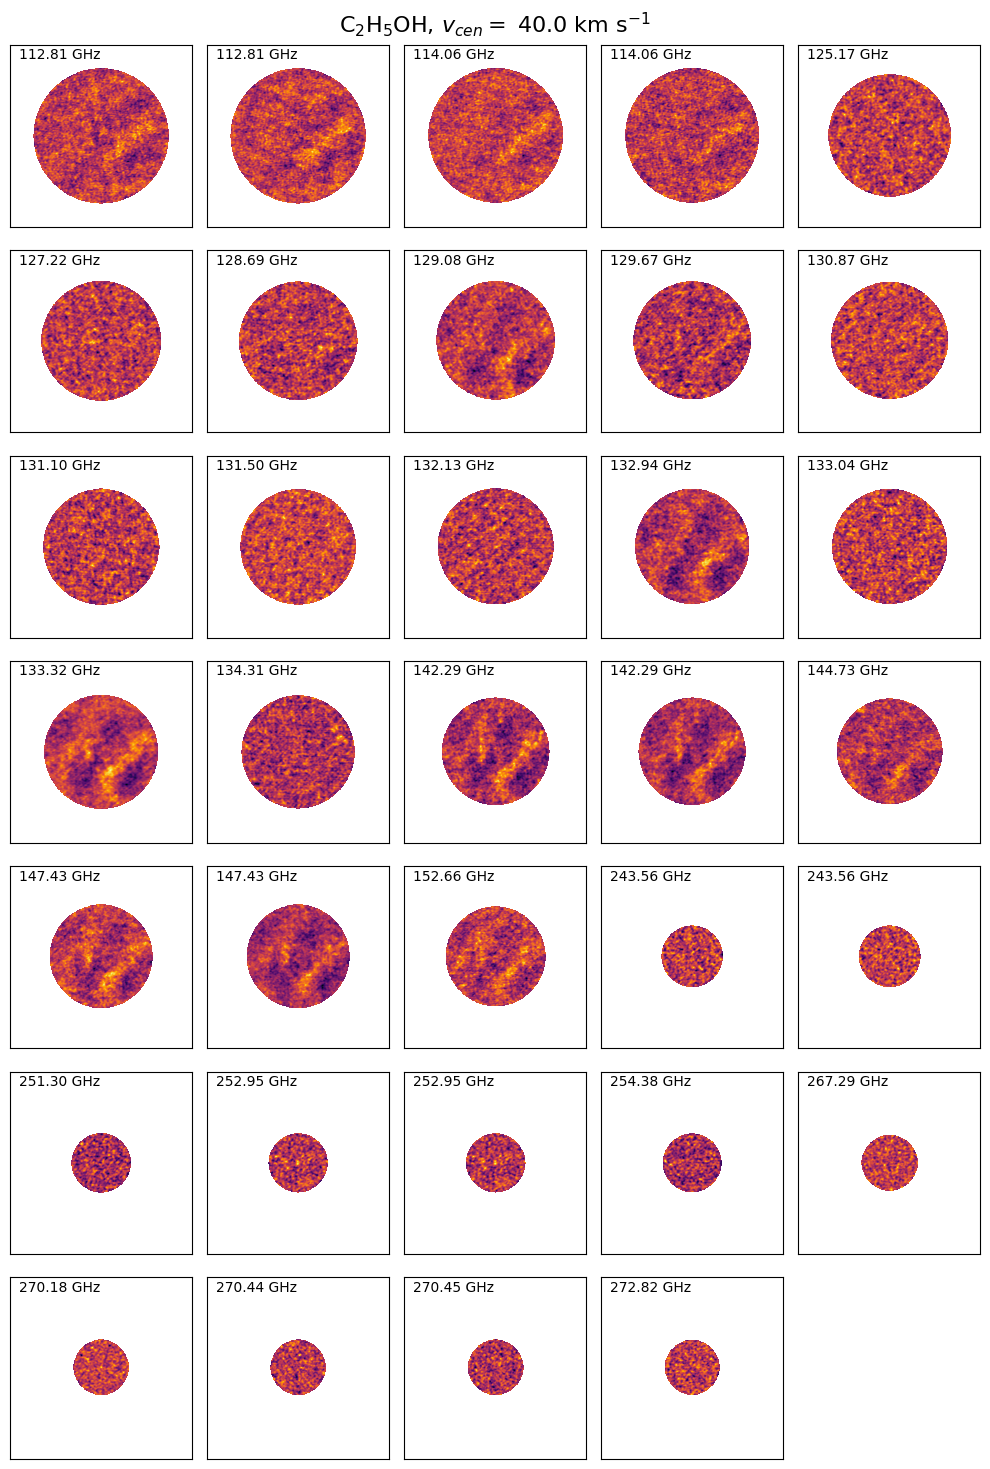

In [9]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=40.*u.km/u.s, fig_width=10, fig_height=15, nrows=7, ncols=5, name_for_plot=f'C$_2$H$_5$OH')

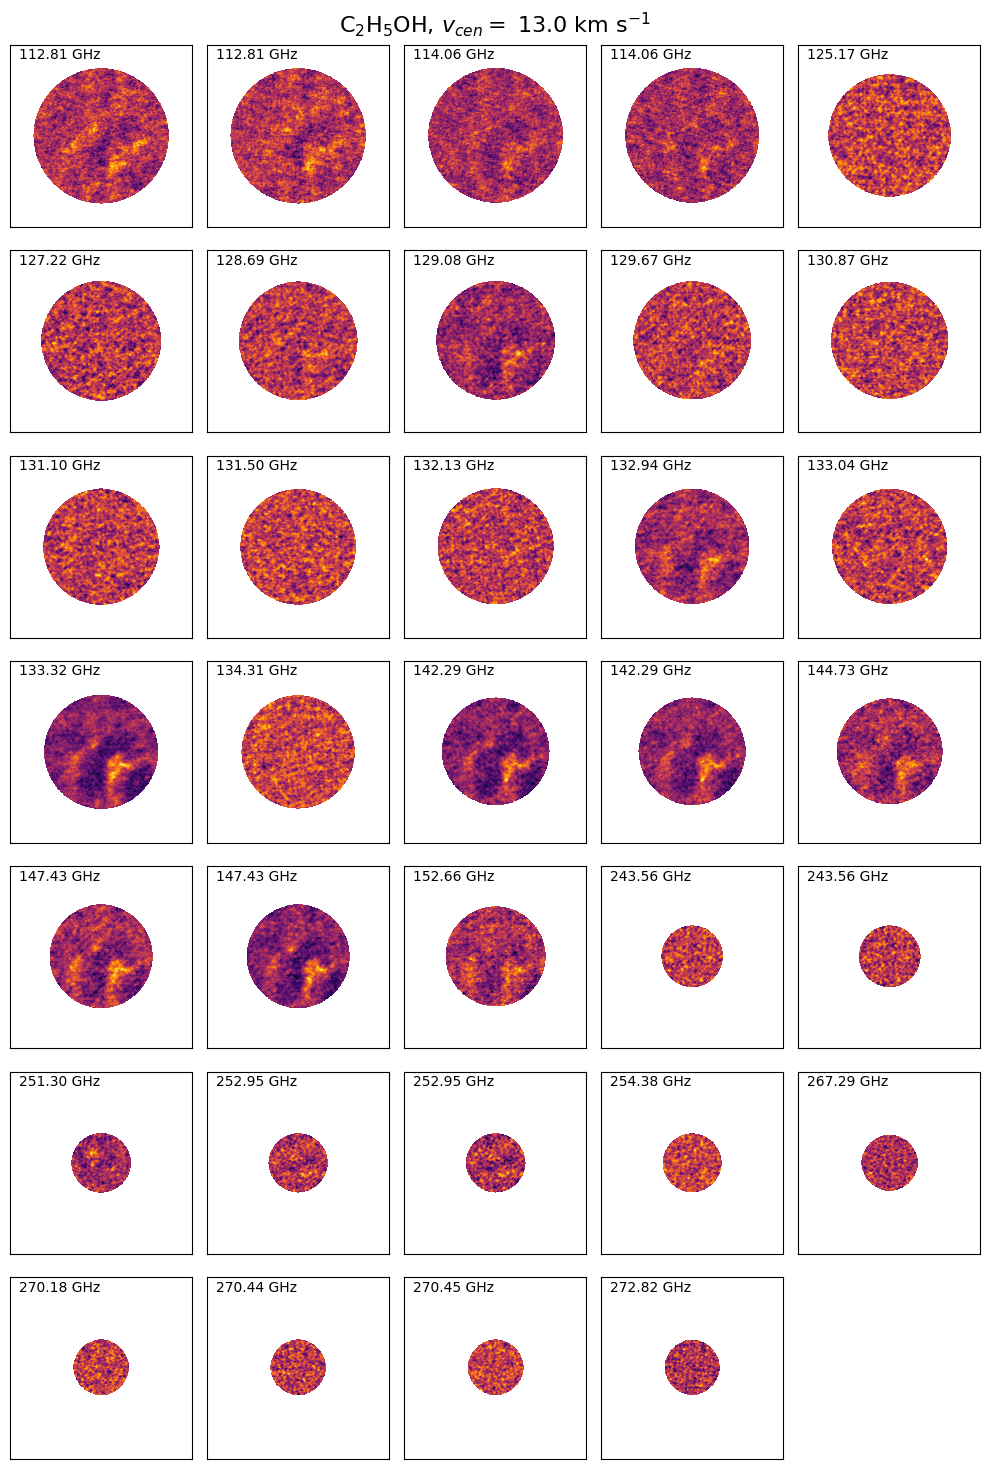

In [21]:
# Plot moment maps
plot_mom0s(cubes, freqs, v_cen=13.*u.km/u.s, fig_width=10, fig_height=15, nrows=7, ncols=5, name_for_plot=f'C$_2$H$_5$OH')